#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre y matrícula:**   Juan Sebastián Ortega Briones A01794327

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [120]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, make_scorer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.model_selection import GridSearchCV, cross_validate
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# Cargamos los datos:
#url = 'https://raw.githubusercontent.com/JSOrtegaB/IAyAA_Actividad4/main/SouthGermanCredit.asc'   # para usar con cloab
url = './SouthGermanCredit.asc'  # para usar con jupyter
df = pd.read_csv(url,sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [3]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************

rename_dict = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'amount',
    'sparkont': 'savings',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors',
    'wohnzeit': 'present_residence',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'number_credits',
    'beruf': 'job',
    'pers': 'people_liable',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk'
}

# Renaming the columns in the DataFrame
df = df.rename(columns=rename_dict)


# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

In [4]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************

print(df['credit_risk'].value_counts())
df['credit_risk'] = 1 - df['credit_risk']

# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

credit_risk
1    700
0    300
Name: count, dtype: int64
credit_risk
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [5]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

X = df.drop('credit_risk', axis=1)    # Features
y = df['credit_risk']                 # Target variable

Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.3, random_state=1)

Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=1)


# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 4**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **Variables Categóricas**

- **status (Estado de la cuenta corriente)**

  - **Descripción**: Estado de la cuenta corriente.
  - **Tipo**: Categórica
  - **Niveles**: 4
  - **sin cuenta corriente**: El solicitante no tiene cuenta corriente.
  - **... < 0 DM**: El saldo de la cuenta corriente es negativo, es decir, el solicitante debe dinero.
  - **0<= ... < 200 DM**: El saldo de la cuenta corriente está entre 0 y 199 Deutsche Mark, indicando que el solicitante tiene algo de ahorro pero menos de 200 DM.
  - **... >= 200 DM / salario durante al menos 1 año**: El saldo de la cuenta corriente es de 200 Deutsche Mark o más, o el solicitante ha recibido salario en su cuenta corriente por al menos 1 año, lo que sugiere una situación financiera más estable o segura.

- **credit_history (Historial de crédito)**

  - **Descripción**: Calidad del historial de crédito.
  - **Tipo**: Categórica
  - **Niveles**: 5 (retraso en pagos en el pasado, cuenta crítica/otros créditos en otro lugar, sin créditos tomados/todos los créditos devueltos debidamente, créditos existentes devueltos debidamente hasta ahora, todos los créditos en este banco devueltos debidamente)

- **purpose (Propósito)**

  - **Descripción**: Propósito del préstamo.
  - **Tipo**: Categórica
  - **Niveles**: 11 (otros, coche (nuevo), coche (usado), muebles/equipamiento, radio/televisión, electrodomésticos, reparaciones, educación, vacaciones, reciclaje profesional, negocio)

- **savings (Estado de la cuenta de ahorros)**

  - **Descripción**: Estado de la cuenta de ahorros.
  - **Tipo**: Categórica
  - **Niveles**: 5 (desconocido/sin cuenta de ahorros, ... < 100 DM, 100 <= ... < 500 DM, 500 <= ... < 1000 DM, ... >= 1000 DM)

- **employment_duration (Duración del empleo)**

  - **Descripción**: Duración del empleo.
  - **Tipo**: Categórica
  - **Niveles**: 5 (desempleado, < 1 año, 1 <= ... < 4 años, 4 <= ... < 7 años, >= 7 años)

- **personal_status_sex (Estado personal y sexo)**

  - **Descripción**: Estado personal y sexo.
  - **Tipo**: Categórica
  - **Niveles**: 4 (masculino: divorciado/separado, femenino: no soltera o masculino: soltero, masculino: casado/viudo, femenino: soltera)

- **other_debtors (Otros deudores)**

  - **Descripción**: Otros deudores/avalistas.
  - **Tipo**: Categórica
  - **Niveles**: 3 (ninguno, co-solicitante, avalista)

- **property (Propiedad)**

  - **Descripción**: Propiedad de activos.
  - **Tipo**: Categórica
  - **Niveles**: 4 (desconocido/sin propiedad, coche u otro, ahorros en sociedad de construcción/seguro de vida, bienes inmuebles)

- **other_installment_plans (Otros planes de pago)**

  - **Descripción**: Otros planes de instalación.
  - **Tipo**: Categórica
  - **Niveles**: 3 (banco, tiendas, ninguno)

- **housing (Vivienda)**

  - **Descripción**: Situación de vivienda.
  - **Tipo**: Categórica
  - **Niveles**: 3 (gratis, alquiler, propia)

- **job (Trabajo)**

  - **Descripción**: Tipo de trabajo.
  - **Tipo**: Categórica
  - **Niveles**: 4 (desempleado/no cualificado - no residente, no cualificado - residente, empleado cualificado/oficial, gerente/autónomo/cualificado altamente)

- **people_liable (Dependientes)**

  - **Descripción**: Número de personas de las que el solicitante es responsable.
  - **Tipo**: Categórica
  - **Niveles**: 2 (3 o más, 0 a 2)

- **telephone (Teléfono)**

  - **Descripción**: Propiedad de un teléfono.
  - **Tipo**: Categórica
  - **Niveles**: 2 (no, sí (a nombre del cliente))

- **foreign_worker (Trabajador extranjero)**

  - **Descripción**: Si la persona es un trabajador extranjero.

- **Tipo**: Categórica
- **Niveles**: 2 (sí, no)

- **credit_risk (Riesgo de crédito)**
  - **Descripción**: Clasificación del riesgo de crédito.
  - **Tipo**: Categórica
  - **Niveles**: 2 (malo, bueno)

### **Variables Numéricas**

- **duration (Duración)**

  - **Descripción**: Duración del préstamo en meses.
  - **Tipo**: Numérica (Cuantitativa)

- **amount (Cantidad)**

  - **Descripción**: Monto del préstamo.
  - **Tipo**: Numérica (Cuantitativa)

- **age (Edad)**

  - **Descripción**: Edad del solicitante.
  - **Tipo**: Numérica (Cuantitativa)

- **installment_rate (Tasa de cuota)**

  - **Descripción**: Tasa de cuota como porcentaje de ingresos disponibles.
  - **Tipo**: Categórica ordenada (tratada como puntuaciones discretizadas pero esencialmente numérica)

- **present_residence (Residencia actual)**

  - **Descripción**: Duración en la residencia actual.
  - **Tipo**: Categórica ordenada (tratada como puntuaciones discretizadas pero esencialmente numérica)

- **number_credits (Número de créditos)**
  - **Descripción**: Número de créditos existentes en este banco.
  - **Tipo**: Categórica ordenada (tratada como puntuaciones discretizadas pero esencialmente numérica)

---


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

In [6]:
column_names = ['duration', 'amount', 'age', 'installment_rate', 'present_residence', 'number_credits']
n_cols = len(column_names)  # Number of numerical columns to plot
n_rows = int(np.ceil(n_cols / 3))  # Adjust the number of rows in the grid

# Create a subplot figure with 3 columns and a dynamic number of rows based on your columns
fig = make_subplots(rows=n_rows, cols=3, horizontal_spacing=0.1, subplot_titles=[f'Histogram of {col}' for col in column_names])

# Plot each numerical column
for i, col in enumerate(column_names):
    row = i // 3 + 1
    col_idx = i % 3 + 1
    fig.add_trace(
        go.Histogram(x=Xtrain[col], marker_color="skyblue", showlegend=False),
        row=row, col=col_idx
    )

# Update layout if needed, adjust margins, and hide any unused subplots if the number of numerical columns is not a multiple of 3
if n_cols % 3:
    for j in range(n_cols % 3 + 1, 4):
        fig.update_layout({f'xaxis{j}': {'visible': False}, f'yaxis{j}': {'visible': False}})

fig.update_layout(height=400 * n_rows, width=1200, title_text="Histograms of Numerical Columns")
fig.show()



### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


- **status (Estado de la cuenta corriente)**
  - **Transformacion** Se mantiene igual

- **credit_history (Historial de crédito)**
  - **Transformacion** Se mantiene igual

- **purpose (Propósito)**
  - **Transformacion** Se hace one hot encoding

- **savings (Estado de la cuenta de ahorros)**
  - **Transformacion** Se mantiene igual

- **employment_duration (Duración del empleo)**
  - **Transformacion** Se mantiene igual

- **personal_status_sex (Estado personal y sexo)**
  - **Transformacion** one hot encoding

- **other_debtors (Otros deudores)**
  - **Transformacion** one hot encoding

- **property (Propiedad)**
  - **Transformacion** Se mantiene igual

- **other_installment_plans (Otros planes de pago)**
  - **Transformacion** Se mantiene igual

- **housing (Vivienda)**
  - **Transformacion** Se mantiene igual

- **job (Trabajo)**
  - **Transformacion** Se mantiene igual

- **people_liable (Dependientes)**
  - **Transformacion** Se mantiene igual

- **telephone (Teléfono)**
  - **Transformacion** Se mantiene igual

- **foreign_worker (Trabajador extranjero)**
  - **Transformacion** Se mantiene igual

- **credit_risk (Riesgo de crédito)**
  - **Transformacion** Se mantiene igual

### **Variables Numéricas**

- **duration (Duración)**
  - **Transformacion** Transformación a un rango entre 0 y 5 para homologar con las variables categoricas ordenadas

- **amount (Cantidad)**
  - **Transformacion** Transformacion logaritmica, los datos estan muy sesgados la izquierda

- **age (Edad)**
  - **Transformacion** Transformación a un rango entre 0 y 5 para homologar con las variables categoricas ordenadas

- **installment_rate (Tasa de cuota)**
  - **Transformacion** Se mantiene igual

- **present_residence (Residencia actual)**
  - **Transformacion** Se mantiene igual

- **number_credits (Número de créditos)**
  - **Transformacion**  Se mantiene igual




### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [8]:
all_column_names=Xtrain.columns.tolist()

# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:

# Definición de la transformación logarítmica
def log_transform(x):
    return np.log1p(x)  # Usamos log1p para evitar problemas con valores de 0

# Definición de la transformación para escalar a un rango de 0 a 5
def scale_to_range(x):
    scaler = MinMaxScaler(feature_range=(0, 5))
    return scaler.fit_transform(x)

num_pipe = Pipeline([
    ('log', FunctionTransformer(log_transform, validate=False)),
    ('scale', FunctionTransformer(scale_to_range, validate=False))
])
num_pipe_nombres = ['duration', 'amount', 'age']


# Variables categóricas:
cat_pipe = Pipeline([('onehot', OneHotEncoder())])
cat_pipe_nombres = ['purpose', 'personal_status_sex', 'other_debtors']

# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(
    transformers=[
      ('num', num_pipe, ['duration', 'amount', 'age']),
      ('cat', cat_pipe, ['purpose', 'personal_status_sex', 'other_debtors'])
    ])



# *********** Aquí termina la sección de agregar código *************



## **Ejercicio 7**

In [9]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

# *********** Aquí termina la sección de agregar código *************


print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


## **Ejercicio 8**

In [99]:
Xtrainval.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
731,4,60,2,0,6527,5,3,4,3,1,4,4,34,3,3,1,3,1,2,2
716,1,48,2,6,7476,1,4,4,3,1,1,4,50,3,3,1,4,2,2,2
640,1,36,4,2,2348,1,3,3,4,1,2,2,46,3,2,2,3,2,2,2
804,1,12,2,0,900,5,3,4,4,1,2,3,23,3,2,1,3,2,1,2
737,4,18,4,3,1149,4,3,4,3,1,3,1,46,3,2,2,3,2,1,2


In [10]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.


  # Regresión Logística:
  modelos.append(LogisticRegression(max_iter=1000))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=5))
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(max_depth=None))
  nombres.append('DTree')

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(n_estimators=100, max_depth=None))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'))
  nombres.append('XGBoost')

  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000))
  nombres.append('MLP')

  # Máquina de Vectores de Soporte:
  modelos.append(SVC(C=1.0, kernel='rbf', class_weight='balanced'))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres

# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = ['accuracy','precision','recall','f1','roc_auc']

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_accuracy 0.702 (0.015)
	 train_accuracy 0.716 (0.005)
	 test_precision 0.533 (0.053)
	 train_precision 0.579 (0.019)
	 test_recall 0.272 (0.054)
	 train_recall 0.257 (0.017)
	 test_f1 0.355 (0.048)
	 train_f1 0.356 (0.018)
	 test_roc_auc 0.679 (0.038)
	 train_roc_auc 0.720 (0.008)
>> kNN
	 test_accuracy 0.673 (0.038)
	 train_accuracy 0.772 (0.010)
	 test_precision 0.443 (0.116)
	 train_precision 0.688 (0.023)
	 test_recall 0.304 (0.090)
	 train_recall 0.464 (0.030)
	 test_f1 0.358 (0.099)
	 train_f1 0.554 (0.026)
	 test_roc_auc 0.619 (0.038)
	 train_roc_auc 0.829 (0.015)
>> DTree
	 test_accuracy 0.634 (0.049)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.411 (0.064)
	 train_precision 1.000 (0.000)
	 test_recall 0.440 (0.093)
	 train_recall 1.000 (0.000)
	 test_f1 0.421 (0.070)
	 train_f1 1.000 (0.000)
	 test_roc_auc 0.579 (0.049)
	 train_roc_auc 1.000 (0.000)
>> RF
	 test_accuracy 0.678 (0.025)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.468 (0.061)
	 train_preci

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

En este contexto, el Falso Negativo es el error más costoso, debido al costo financiero, esto es implicaria otorgar un credito a alguien que no lo lo pagará. El falso positivo tambien tiene un costo de la perdida de un cliente y los ingresos de esos intereses del credito no otorgado, pero es menor que la pardida del capital + los intereses.

b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

En primer término, el Recall y, en segundo, el F1-Score son las métricas que considero más importantes para evaluar modelos destinados a identificar malos clientes (es decir, clientes que probablemente no pagarán sus créditos) para un banco. La razón principal para priorizar el Recall es que esta métrica se centra en la capacidad del modelo para detectar todos los posibles casos de clientes que no cumplirán con sus obligaciones crediticias.
Sin embargo, enfocarse exclusivamente en el Recall puede llevar a un incremento en los Falsos Positivos, donde clientes potencialmente buenos son erróneamente clasificados como riesgosos. Esto podría resultar en la pérdida de oportunidades de negocio valiosas y afectar negativamente la relación del banco con sus clientes.

c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.


Métricas adicionales para el análisis de riesgo crediticio:
1. Kappa de Cohen:

Mide la concordancia entre la predicción del modelo y la clasificación real de los clientes. Un valor alto indica un buen acuerdo, mientras que un valor bajo puede indicar que el modelo no es efectivo.

2. Curva ROC y AUC:

La curva ROC (Receiver Operating Characteristic) muestra la capacidad del modelo para distinguir entre buenos y malos clientes. El AUC (Area Under the Curve) es un resumen de la curva ROC, y un valor superior a 0.5 indica que el modelo es mejor que el azar.

3. Índice de Gini:

Mide la capacidad del modelo para clasificar correctamente a los clientes. Un índice de Gini alto indica una buena capacidad de clasificación.


### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

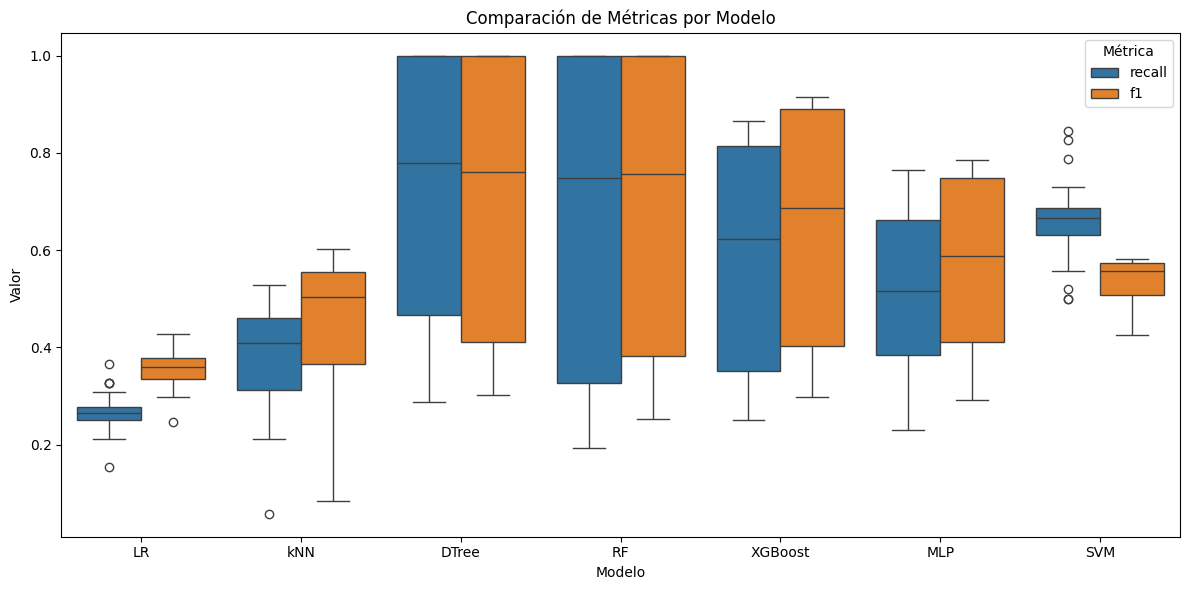

In [11]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************

metricas_interes = ['recall', 'f1']
datos_modelos = {nombre: {metrica: [] for metrica in metricas_interes} for nombre in nombres}

# Obtener datos de los modelos, asumiendo que 'nombres' y 'resultados' están definidos
for i, modelo_resultados in enumerate(resultados):
    nombre_modelo = nombres[i]
    for metrica in metricas_interes:
        datos_modelos[nombre_modelo][metrica] = modelo_resultados[f'train_{metrica}'].tolist() + modelo_resultados[f'test_{metrica}'].tolist()

# Convertir los datos a un formato adecuado para seaborn
datos_lista = []
for nombre_modelo, metricas in datos_modelos.items():
    for metrica, valores in metricas.items():
        for valor in valores:
            datos_lista.append({'Modelo': nombre_modelo, 'Métrica': metrica, 'Valor': valor})

df = pd.DataFrame(datos_lista)

# Crear diagrama de caja y bigotes con seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Modelo', y='Valor', hue='Métrica')
plt.title('Comparación de Métricas por Modelo')
plt.tight_layout()
plt.show()

# *********** Aquí termina la sección de agregar código *************


# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

>> SVM
	 accuracy: 0.621 (0.042)
	 precision: 0.422 (0.039)
	 recall: 0.609 (0.061)
	 f1: 0.496 (0.029)
	 roc_auc: 0.617 (0.028)
>> MLP
	 accuracy: 0.604 (0.032)
	 precision: 0.391 (0.031)
	 recall: 0.517 (0.073)
	 f1: 0.443 (0.037)
	 roc_auc: 0.580 (0.029)
>> XGBoost
	 accuracy: 0.597 (0.053)
	 precision: 0.392 (0.054)
	 recall: 0.551 (0.082)
	 f1: 0.456 (0.055)
	 roc_auc: 0.584 (0.050)


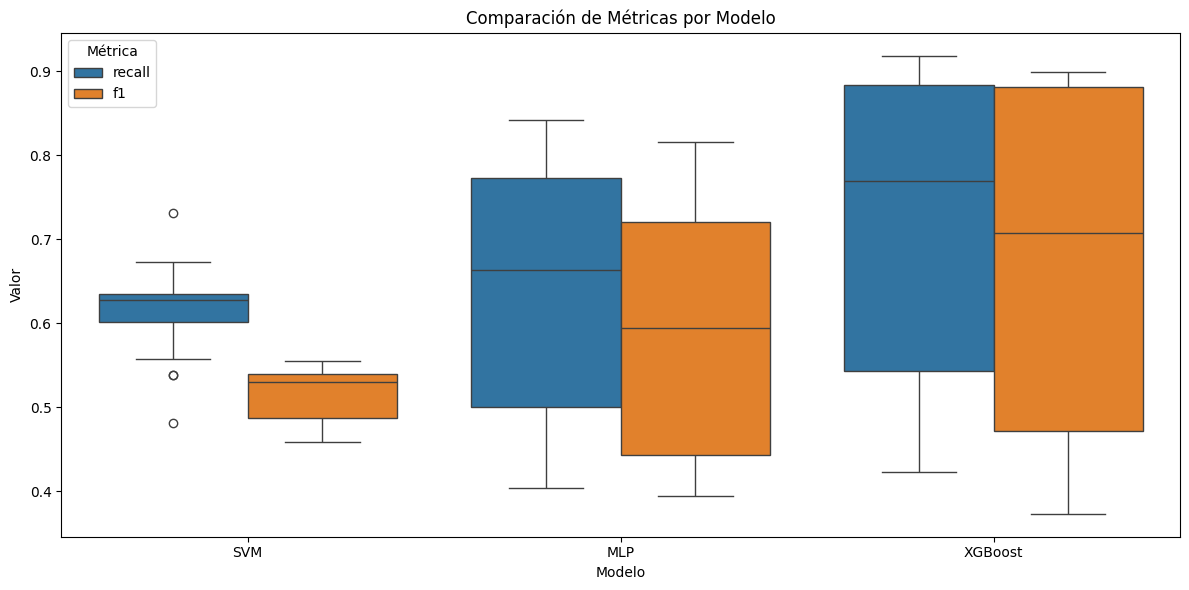

In [12]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

# ************* Inlcuye aquí tu código:**************************

def mis_modelos_con_smote():
    modelos, nombres = list(), list()

    # Solo seleccionamos SVM, MLP y XGBoost para reentrenar con SMOTE
    modelos.append(SVC(C=1.0, kernel='rbf', class_weight='balanced'))
    nombres.append('SVM')

    modelos.append(MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000))
    nombres.append('MLP')

    modelos.append(XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'))
    nombres.append('XGBoost')

    return modelos, nombres

modelos, nombres = mis_modelos_con_smote()
resultados = list()

# Definimos las métricas de evaluación
mismetricas = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score),
               'f1': make_scorer(f1_score),
               'roc_auc': make_scorer(roc_auc_score)}

# Ciclo para entrenar cada modelo con SMOTE
for i, modelo in enumerate(modelos):
    # Definimos nuestro pipeline con SMOTE, transformaciones y el modelo
    pipeline = IMBPipeline(steps=[('smote', SMOTE(random_state=1)),
                                  ('ct', columnasTransformer),
                                  ('m', modelo)])

    # Aplicaremos validación cruzada
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

    # Llevamos a cabo el entrenamiento y evaluación
    scores = cross_validate(pipeline,
                            Xtrainval,
                            ytrainval,
                            scoring=mismetricas,
                            cv=micv,
                            return_train_score=True)

    resultados.append(scores)

    # Desplegamos los valores de las métricas
    print('>> %s' % nombres[i])
    for metrica in mismetricas.keys():
        mean_score = np.mean(scores[f'test_{metrica}'])
        std_score = np.std(scores[f'test_{metrica}'])
        print(f'\t {metrica}: {mean_score:.3f} ({std_score:.3f})')

        metricas_interes = ['recall', 'f1']
datos_modelos = {nombre: {metrica: [] for metrica in metricas_interes} for nombre in nombres}

# Obtener datos de los modelos, asumiendo que 'nombres' y 'resultados' están definidos
for i, modelo_resultados in enumerate(resultados):
    nombre_modelo = nombres[i]
    for metrica in metricas_interes:
        datos_modelos[nombre_modelo][metrica] = modelo_resultados[f'train_{metrica}'].tolist() + modelo_resultados[f'test_{metrica}'].tolist()

# Convertir los datos a un formato adecuado para seaborn
datos_lista = []
for nombre_modelo, metricas in datos_modelos.items():
    for metrica, valores in metricas.items():
        for valor in valores:
            datos_lista.append({'Modelo': nombre_modelo, 'Métrica': metrica, 'Valor': valor})

df = pd.DataFrame(datos_lista)

# Crear diagrama de caja y bigotes con seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Modelo', y='Valor', hue='Métrica')
plt.title('Comparación de Métricas por Modelo')
plt.tight_layout()
plt.show()

# *********** Aquí termina la sección de agregar código *************

# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Hasta ahora el modelo SVM sin SMOTE para la clase positiva es el mejor modelo que se ha obtenido considerando el balance de las métricas, debido a su alto recall y el mayor F1 score. Esto sugiere que es más efectivo para identificar casos de riesgo de impago. 

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [98]:
# Con dicho mejor modelo y utilizando la técnica de validación cruzada, busca
# los mejores hiperparámetros de dicho modelo y despliega todas las métricas que
#se han estado desplegando. Verifica que tu modelo no esté sobreentrenado e indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.


# ************* Inlcuye aquí tu código:**************************

# Definición de modelo SVM
svm = SVC(probability=True,class_weight='balanced', max_iter=1000000)

# Hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'C': [ .1,1,10],
    'kernel': [ 'rbf', 'poly', 'sigmoid'],
    'degree': [ 3, 5],
    'gamma': ['scale', 'auto'],
}

# Métricas de evaluación
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm, param_grid, scoring=scoring, refit='recall', cv=5, verbose=3, return_train_score=True, n_jobs=-1)

# Ajuste del modelo
grid_search.fit(Xtrainval, ytrainval)

# Mejores hiperparámetros y resultados
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Resultados de la validación cruzada para el mejor modelo
cv_results = cross_validate(grid_search.best_estimator_, Xtrainval, ytrainval, cv=5, scoring=scoring, n_jobs=-1)


print("Los mejores parametros",best_params)


print("Puntajes promedio para el mejor modelo en el conjunto de prueba:")
for metric in scoring.keys():
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"{metric}: {mean_score:.3f} (std: {std_score:.3f})")

# *********** Aquí termina la sección de agregar código *************


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 2/5] END C=0.1, degree=3, gamma=scale, kernel=poly; accuracy: (train=0.701, test=0.700) f1: (train=0.185, test=0.105) precision: (train=0.561, test=0.600) recall: (train=0.111, test=0.058) roc_auc: (train=0.541, test=0.629) total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=scale, kernel=poly; accuracy: (train=0.700, test=0.706) f1: (train=0.150, test=0.242) precision: (train=0.562, test=0.571) recall: (train=0.087, test=0.154) roc_auc: (train=0.551, test=0.590) total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=scale, kernel=poly; accuracy: (train=0.700, test=0.718) f1: (train=0.164, test=0.143) precision: (train=0.556, test=1.000) recall: (train=0.096, test=0.077) roc_auc: (train=0.563, test=0.535) total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=scale, kernel=poly; accuracy: (train=0.703, test=0.694) f1: (train=0.172, test=0.161) precision: (train=0.583, test=0.500) recall: (train=0.101, test=0.096) roc_

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid; accuracy: (train=0.344, test=0.429) f1: (train=0.359, test=0.419) precision: (train=0.256, test=0.304) recall: (train=0.601, test=0.673) roc_auc: (train=0.601, test=0.544) total time=   0.1s
[CV 2/5] END C=0.1, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.704, test=0.700) f1: (train=0.130, test=0.105) precision: (train=0.652, test=0.600) recall: (train=0.072, test=0.058) roc_auc: (train=0.541, test=0.629) total time=   0.3s
[CV 4/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid; accuracy: (train=0.360, test=0.294) f1: (train=0.385, test=0.368) precision: (train=0.273, test=0.254) recall: (train=0.654, test=0.673) roc_auc: (train=0.568, test=0.622) total time=   0.1s
[CV 5/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid; accuracy: (train=0.334, test=0.359) f1: (train=0.409, test=0.435) precision: (train=0.281, test=0.298) recall: (train=0.755, test=0.808) roc_auc: (train=0.571, test=0.609) total time=   0.1s
[CV

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, degree=3, gamma=scale, kernel=rbf; accuracy: (train=0.666, test=0.671) f1: (train=0.338, test=0.364) precision: (train=0.430, test=0.444) recall: (train=0.279, test=0.308) roc_auc: (train=0.580, test=0.594) total time=   0.1s
[CV 3/5] END C=1, degree=3, gamma=scale, kernel=rbf; accuracy: (train=0.668, test=0.671) f1: (train=0.351, test=0.378) precision: (train=0.436, test=0.447) recall: (train=0.293, test=0.327) roc_auc: (train=0.586, test=0.583) total time=   0.1s
[CV 2/5] END C=1, degree=3, gamma=scale, kernel=poly; accuracy: (train=0.700, test=0.700) f1: (train=0.184, test=0.105) precision: (train=0.548, test=0.600) recall: (train=0.111, test=0.058) roc_auc: (train=0.543, test=0.631) total time=   0.1s
[CV 2/5] END C=1, degree=3, gamma=scale, kernel=rbf; accuracy: (train=0.674, test=0.665) f1: (train=0.327, test=0.329) precision: (train=0.443, test=0.424) recall: (train=0.260, test=0.269) roc_auc: (train=0.602, test=0.557) total time=   0.1s
[CV 4/5] END C=1, degre

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.701, test=0.706) f1: (train=0.106, test=0.074) precision: (train=0.632, test=1.000) recall: (train=0.058, test=0.038) roc_auc: (train=0.543, test=0.502) total time=   0.5s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.700, test=0.700) f1: (train=0.143, test=0.105) precision: (train=0.567, test=0.600) recall: (train=0.082, test=0.058) roc_auc: (train=0.456, test=0.368) total time=   0.6s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.700, test=0.700) f1: (train=0.128, test=0.164) precision: (train=0.577, test=0.556) recall: (train=0.072, test=0.096) roc_auc: (train=0.553, test=0.587) total time=   0.7s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.701, test=0.700) f1: (train=0.129, test=0.136) precision: (train=0.600, test=0.571) recall: (train=0.072, test=0.077) roc_auc: (train=0.615, test=0.548) total time=   0.7s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.703, test=0.682) f1: (train=0.144, test=0.100) precision: (train=0.607, test=0.375) recall: (train=0.082, test=0.058) roc_auc: (train=0.444, test=0.455) total time=   0.4s
[CV 1/5] END C=1, degree=5, gamma=scale, kernel=sigmoid; accuracy: (train=0.418, test=0.418) f1: (train=0.315, test=0.298) precision: (train=0.246, test=0.236) recall: (train=0.438, test=0.404) roc_auc: (train=0.415, test=0.385) total time=   0.1s
[CV 2/5] END C=1, degree=5, gamma=scale, kernel=sigmoid; accuracy: (train=0.404, test=0.459) f1: (train=0.291, test=0.333) precision: (train=0.229, test=0.267) recall: (train=0.399, test=0.442) roc_auc: (train=0.400, test=0.449) total time=   0.1s
[CV 3/5] END C=1, degree=5, gamma=scale, kernel=sigmoid; accuracy: (train=0.410, test=0.418) f1: (train=0.290, test=0.336) precision: (train=0.230, test=0.258) recall: (train=0.394, test=0.481) roc_auc: (train=0.596, test=0.579) total time=   0.1s
[CV 4/5] EN

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.306, test=0.324) f1: (train=0.417, test=0.410) precision: (train=0.281, test=0.280) recall: (train=0.812, test=0.769) roc_auc: (train=0.459, test=0.426) total time=   8.7s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.306, test=0.318) f1: (train=0.419, test=0.437) precision: (train=0.281, test=0.292) recall: (train=0.817, test=0.865) roc_auc: (train=0.533, test=0.621) total time=   9.0s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.309, test=0.306) f1: (train=0.415, test=0.416) precision: (train=0.280, test=0.280) recall: (train=0.803, test=0.808) roc_auc: (train=0.436, test=0.529) total time=   9.5s
[CV 2/5] END C=1, degree=5, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.1s
[CV 3/5] END C=1, degree=5, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.1s
[CV 4/5] END C=1, degree=5, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END 

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.325, test=0.318) f1: (train=0.408, test=0.408) precision: (train=0.279, test=0.278) recall: (train=0.760, test=0.769) roc_auc: (train=0.555, test=0.532) total time=  10.0s
[CV 2/5] END C=10, degree=3, gamma=scale, kernel=rbf; accuracy: (train=0.626, test=0.553) f1: (train=0.420, test=0.345) precision: (train=0.400, test=0.312) recall: (train=0.442, test=0.385) roc_auc: (train=0.600, test=0.534) total time=   0.1s
[CV 3/5] END C=0.1, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.687, test=0.676) f1: (train=0.278, test=0.304) precision: (train=0.471, test=0.444) recall: (train=0.197, test=0.231) roc_auc: (train=0.558, test=0.577) total time=   9.5s
[CV 1/5] END C=0.1, degree=3, gamma=auto, kernel=sigmoid; accuracy: (train=0.694, test=0.694) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.500, test=0.500) total time=   0.0s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, degree=3, gamma=scale, kernel=rbf; accuracy: (train=0.665, test=0.671) f1: (train=0.349, test=0.378) precision: (train=0.430, test=0.447) recall: (train=0.293, test=0.327) roc_auc: (train=0.598, test=0.585) total time=   0.1s
[CV 1/5] END C=0.1, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.691, test=0.706) f1: (train=0.271, test=0.306) precision: (train=0.487, test=0.550) recall: (train=0.188, test=0.212) roc_auc: (train=0.567, test=0.541) total time=  10.3s
[CV 5/5] END C=10, degree=3, gamma=scale, kernel=rbf; accuracy: (train=0.674, test=0.671) f1: (train=0.343, test=0.364) precision: (train=0.446, test=0.444) recall: (train=0.279, test=0.308) roc_auc: (train=0.615, test=0.611) total time=   0.1s
[CV 4/5] END C=10, degree=3, gamma=scale, kernel=rbf; accuracy: (train=0.672, test=0.647) f1: (train=0.399, test=0.286) precision: (train=0.454, test=0.375) recall: (train=0.356, test=0.231) roc_auc: (train=0.623, test=0.550) total time=   0.1s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, degree=3, gamma=scale, kernel=poly; accuracy: (train=0.696, test=0.694) f1: (train=0.182, test=0.103) precision: (train=0.511, test=0.500) recall: (train=0.111, test=0.058) roc_auc: (train=0.556, test=0.643) total time=   0.3s
[CV 1/5] END C=10, degree=3, gamma=scale, kernel=poly; accuracy: (train=0.697, test=0.706) f1: (train=0.169, test=0.138) precision: (train=0.525, test=0.667) recall: (train=0.101, test=0.077) roc_auc: (train=0.567, test=0.539) total time=   0.3s
[CV 3/5] END C=1, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.306, test=0.324) f1: (train=0.417, test=0.410) precision: (train=0.281, test=0.280) recall: (train=0.812, test=0.769) roc_auc: (train=0.540, test=0.573) total time=   9.3s
[CV 1/5] END C=10, degree=3, gamma=scale, kernel=sigmoid; accuracy: (train=0.425, test=0.424) f1: (train=0.310, test=0.300) precision: (train=0.245, test=0.239) recall: (train=0.423, test=0.404) roc_auc: (train=0.586, test=0.614) total time=   0.0s
[CV 4/5] END C=

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, degree=3, gamma=auto, kernel=rbf; accuracy: (train=1.000, test=0.688) f1: (train=1.000, test=0.000) precision: (train=1.000, test=0.000) recall: (train=1.000, test=0.000) roc_auc: (train=0.000, test=0.510) total time=   0.1s
[CV 5/5] END C=10, degree=3, gamma=scale, kernel=poly; accuracy: (train=0.696, test=0.700) f1: (train=0.169, test=0.190) precision: (train=0.512, test=0.545) recall: (train=0.101, test=0.115) roc_auc: (train=0.568, test=0.561) total time=   0.3s
[CV 5/5] END C=1, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.325, test=0.318) f1: (train=0.408, test=0.408) precision: (train=0.279, test=0.278) recall: (train=0.760, test=0.769) roc_auc: (train=0.555, test=0.532) total time=   9.7s
[CV 1/5] END C=10, degree=3, gamma=auto, kernel=rbf; accuracy: (train=1.000, test=0.694) f1: (train=1.000, test=0.000) precision: (train=1.000, test=0.000) recall: (train=1.000, test=0.000) roc_auc: (train=0.000, test=0.522) total time=   0.2s
[CV 3/5] END C=10, deg

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.690, test=0.700) f1: (train=0.308, test=0.301) precision: (train=0.485, test=0.524) recall: (train=0.226, test=0.212) roc_auc: (train=0.437, test=0.451) total time=  10.7s
[CV 1/5] END C=0.1, degree=5, gamma=auto, kernel=sigmoid; accuracy: (train=0.694, test=0.694) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=auto, kernel=rbf; accuracy: (train=1.000, test=0.694) f1: (train=1.000, test=0.000) precision: (train=1.000, test=0.000) recall: (train=1.000, test=0.000) roc_auc: (train=0.000, test=0.376) total time=   0.1s
[CV 1/5] END C=10, degree=3, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.1s
[CV 1/5] END 

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, degree=3, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.1s
[CV 4/5] END C=10, degree=3, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.1s
[CV 5/5] END C=10, degree=3, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.1s
[CV 1/5] END C=10, degree=5, gamma=scale, kernel=rbf; accuracy: (train=0.663, test=0.671) f1: (train=0.366, test=0.364) precision: (train=0.431, test=0.444) recall: (train=0.317, test=0.308) roc_auc: (train=0.615, test=0.592) total time=   0.1s
[CV 2/5] EN

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.703, test=0.694) f1: (train=0.114, test=0.037) precision: (train=0.650, test=0.500) recall: (train=0.062, test=0.019) roc_auc: (train=0.439, test=0.504) total time=   0.9s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.703, test=0.700) f1: (train=0.158, test=0.105) precision: (train=0.594, test=0.600) recall: (train=0.091, test=0.058) roc_auc: (train=0.561, test=0.648) total time=   1.0s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.707, test=0.700) f1: (train=0.131, test=0.105) precision: (train=0.714, test=0.600) recall: (train=0.072, test=0.058) roc_auc: (train=0.354, test=0.446) total time=   0.9s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.693, test=0.712) f1: (train=0.140, test=0.246) precision: (train=0.486, test=0.615) recall: (train=0.082, test=0.154) roc_auc: (train=0.453, test=0.437) total time=   1.5s
[CV 1/5] END C=10, degree=5, gamma=scale, kernel=sigmoid; accuracy: (train=0.425, test=0.424) f1: (train=0.310, test=0.300) precision: (train=0.245, test=0.239) recall: (train=0.423, test=0.404) roc_auc: (train=0.414, test=0.386) total time=   0.1s
[CV 2/5] END C=10, degree=5, gamma=scale, kernel=sigmoid; accuracy: (train=0.403, test=0.459) f1: (train=0.295, test=0.333) precision: (train=0.231, test=0.267) recall: (train=0.409, test=0.442) roc_auc: (train=0.399, test=0.450) total time=   0.1s
[CV 3/5] END C=10, degree=5, gamma=scale, kernel=sigmoid; accuracy: (train=0.415, test=0.412) f1: (train=0.302, test=0.333) precision: (train=0.238, test=0.255) recall: (train=0.413, test=0.481) roc_auc: (train=0.596, test=0.578) total time=   0.1s
[CV 4/5

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, degree=5, gamma=scale, kernel=poly; accuracy: (train=0.704, test=0.676) f1: (train=0.166, test=0.098) precision: (train=0.606, test=0.333) recall: (train=0.096, test=0.058) roc_auc: (train=0.447, test=0.458) total time=   1.6s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.307, test=0.294) f1: (train=0.436, test=0.439) precision: (train=0.290, test=0.290) recall: (train=0.875, test=0.904) roc_auc: (train=0.443, test=0.470) total time=  10.0s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.687, test=0.676) f1: (train=0.278, test=0.304) precision: (train=0.471, test=0.444) recall: (train=0.197, test=0.231) roc_auc: (train=0.558, test=0.577) total time=   9.4s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.306, test=0.324) f1: (train=0.417, test=0.410) precision: (train=0.281, test=0.280) recall: (train=0.812, test=0.769) roc_auc: (train=0.541, test=0.574) total time=   8.2s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.300, test=0.318) f1: (train=0.433, test=0.448) precision: (train=0.288, test=0.297) recall: (train=0.875, test=0.904) roc_auc: (train=0.566, test=0.473) total time=   9.6s
[CV 4/5] END C=1, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.309, test=0.306) f1: (train=0.415, test=0.416) precision: (train=0.280, test=0.280) recall: (train=0.803, test=0.808) roc_auc: (train=0.564, test=0.471) total time=   9.1s
[CV 5/5] END C=1, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.690, test=0.700) f1: (train=0.308, test=0.301) precision: (train=0.485, test=0.524) recall: (train=0.226, test=0.212) roc_auc: (train=0.437, test=0.451) total time=  10.9s
[CV 1/5] END C=1, degree=5, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.0s
[CV 2/5] END C=0.1,

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, degree=5, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.0s
[CV 2/5] END C=10, degree=5, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.1s
[CV 3/5] END C=10, degree=5, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.1s
[CV 4/5] END C=10, degree=5, gamma=auto, kernel=sigmoid; accuracy: (train=0.306, test=0.306) f1: (train=0.468, test=0.468) precision: (train=0.306, test=0.306) recall: (train=1.000, test=1.000) roc_auc: (train=0.500, test=0.500) total time=   0.0s
[CV 5/5]

/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.691, test=0.706) f1: (train=0.271, test=0.306) precision: (train=0.487, test=0.550) recall: (train=0.188, test=0.212) roc_auc: (train=0.567, test=0.541) total time=   9.6s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.306, test=0.318) f1: (train=0.419, test=0.437) precision: (train=0.281, test=0.292) recall: (train=0.817, test=0.865) roc_auc: (train=0.533, test=0.621) total time=   9.8s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.325, test=0.318) f1: (train=0.408, test=0.408) precision: (train=0.279, test=0.278) recall: (train=0.760, test=0.769) roc_auc: (train=0.445, test=0.468) total time=  10.4s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.307, test=0.294) f1: (train=0.436, test=0.439) precision: (train=0.290, test=0.290) recall: (train=0.875, test=0.904) roc_auc: (train=0.557, test=0.530) total time=   9.4s
[CV 2/5] END C=10, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.303, test=0.300) f1: (train=0.434, test=0.441) precision: (train=0.289, test=0.292) recall: (train=0.875, test=0.904) roc_auc: (train=0.472, test=0.382) total time=   9.3s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.303, test=0.300) f1: (train=0.434, test=0.441) precision: (train=0.289, test=0.292) recall: (train=0.875, test=0.904) roc_auc: (train=0.528, test=0.618) total time=   9.2s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.300, test=0.318) f1: (train=0.433, test=0.448) precision: (train=0.288, test=0.297) recall: (train=0.875, test=0.904) roc_auc: (train=0.434, test=0.527) total time=   8.7s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.309, test=0.306) f1: (train=0.415, test=0.416) precision: (train=0.280, test=0.280) recall: (train=0.803, test=0.808) roc_auc: (train=0.564, test=0.471) total time=   7.9s
[CV 3/5] END C=10, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.687, test=0.676) f1: (train=0.278, test=0.304) precision: (train=0.471, test=0.444) recall: (train=0.197, test=0.231) roc_auc: (train=0.558, test=0.577) total time=   7.8s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.300, test=0.318) f1: (train=0.433, test=0.448) precision: (train=0.288, test=0.297) recall: (train=0.875, test=0.904) roc_auc: (train=0.434, test=0.527) total time=   8.3s


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, degree=5, gamma=auto, kernel=poly; accuracy: (train=0.690, test=0.700) f1: (train=0.308, test=0.301) precision: (train=0.485, test=0.524) recall: (train=0.226, test=0.212) roc_auc: (train=0.437, test=0.451) total time=   8.5s
[CV 2/5] END C=10, degree=3, gamma=auto, kernel=poly; accuracy: (train=0.306, test=0.318) f1: (train=0.419, test=0.437) precision: (train=0.281, test=0.292) recall: (train=0.817, test=0.865) roc_auc: (train=0.467, test=0.379) total time=   8.0s
Los mejores parametros {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'sigmoid'}
Puntajes promedio para el mejor modelo en el conjunto de prueba:
accuracy: 0.306 (std: 0.000)
precision: 0.306 (std: 0.000)
recall: 1.000 (std: 0.000)
f1: 0.468 (std: 0.000)
roc_auc: 0.500 (std: 0.000)


/Users/sortega/maestria_git/iayaa/actividad_5_6/.env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## **Ejercicio 14**

In [105]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.


# ************* Inlcuye aquí tu código:**************************

#Usando las transformaciones usadas para train y val y el modelo con los mejores hiperparámetros
final_pipeline = Pipeline([
    ('transformer', columnasTransformer),
    ('svc', SVC(probability=True, class_weight='balanced',C= 1, gamma= 'auto', kernel= 'sigmoid',max_iter=1000000))
])

# Ajustar el modelo con datos de entrenamiento
final_pipeline.fit(Xtrainval, ytrainval)

# Predecir las etiquetas para el conjunto de prueba
y_pred = final_pipeline.predict(Xtest)

print("Reporte de Clasificación:\n", classification_report(ytest, y_pred))


# *********** Aquí termina la sección de agregar código *************


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       110
           1       0.29      0.40      0.33        40

    accuracy                           0.57       150
   macro avg       0.52      0.52      0.51       150
weighted avg       0.62      0.57      0.59       150



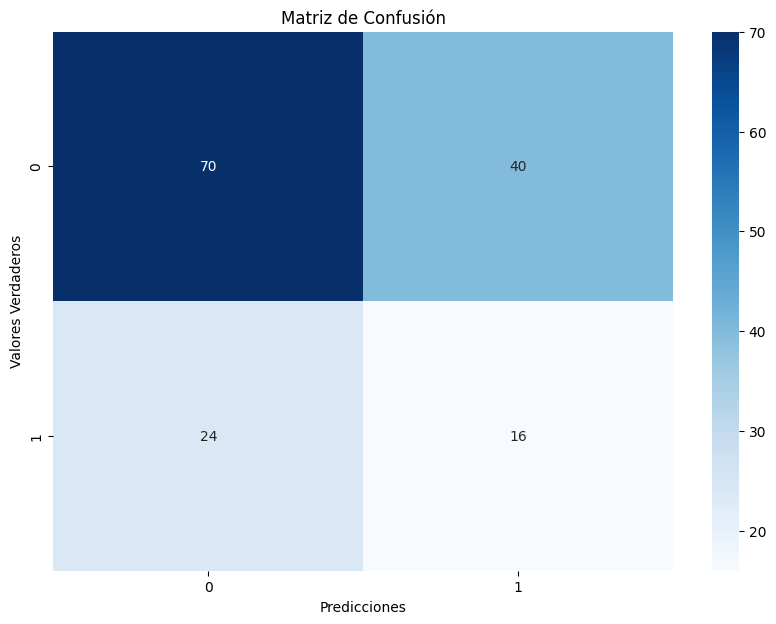

In [106]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************

conf_mat = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

# *********** Aquí termina la sección de agregar código *************

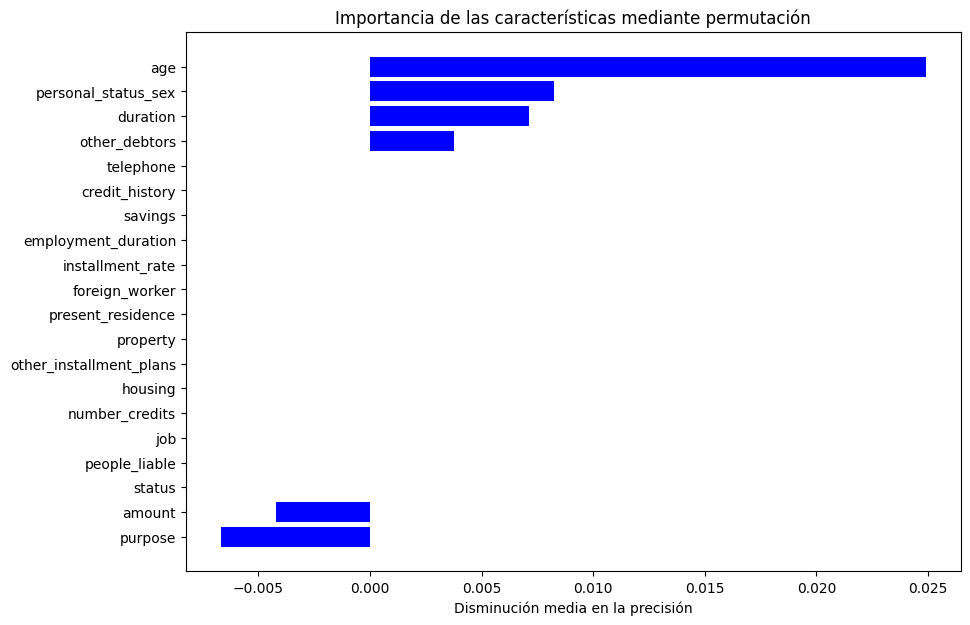

In [119]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

# Realizar la importancia de la permutación en el conjunto de prueba
resultados = permutation_importance(final_pipeline, Xtest, ytest, n_repeats=30, random_state=0, n_jobs=-1)

# Obtener las importancias medias y los índices de las características ordenadas por importancia
importancias_medias = resultados.importances_mean
indices_ordenados = importancias_medias.argsort()

# Visualizar la importancia de las características
plt.figure(figsize=(10, 7))
plt.title("Importancia de las características mediante permutación")
plt.barh(range(len(indices_ordenados)), importancias_medias[indices_ordenados], color='b', align='center')
plt.yticks(range(len(indices_ordenados)), [Xtrainval.columns[i] for i in indices_ordenados])
plt.xlabel("Disminución media en la precisión")
plt.show()



# *********** Aquí termina la sección de agregar código *************

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Mi resultado no fue bueno, esta muy bajo a comparación del articulo de IEEE, creo que el modelo inicial estaba sobre entrenado porque al buscar los mejores hiperparametros con validacion cruzada, el modelo no mejoro, al contrario empeoro. Al validar con los datos de prueba, el modelo fue muy malo, el recall fue muy bajo, lo que significa que el modelo no es capaz de identificar a los clientes que no pagaran su credito.
Tarde mucho tiempo buscando hiperparametros porque no convergian y se quedaba por horas sin terminar, encontre un parametro que divide los procesos en diferentes CPU's (n_jobs=-1) no funciono en colab y lo pase a un ambiente local, esto mejoro mucho pero con algunos parametros de atoraba, busque un parametro que limitara las iteraciones y encontre el parametro max_iter, ya con esto tube muchas oportunidades de buscar los mejores hiperparametros, pero no encontre nada que mejorara el modelo.

### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**